In [1]:
import gravipy
import glob
from astropy.io import fits
import numpy as np

# Initial guesses

In [3]:
orb = gravipy.GCorbits()
# orb = gravipy.GCorbits(verbose=False)

Stars with orbits:
['S1', 'S2', 'S4', 'S8', 'S9', 'S12', 'S13', 'S14', 'S17', 'S18', 'S19', 'S21', 'S23', 'S24', 'S29', 'S31', 'S33', 'S38', 'S42', 'S55', 'S60', 'S66', 'S67', 'S71', 'S83', 'S85', 'S87', 'S89', 'S91', 'S96', 'S97', 'S145', 'S175', 'R34', 'R44']

Stars with proper motions:
['S7', 'S10', 'S11', 'S20', 'S22', 'S25', 'S26', 'S27', 'S30', 'S32', 'S34', 'S35', 'S36', 'S37', 'S41', 'S43', 'S45', 'S46', 'S47', 'S50', 'S51', 'S52', 'S53', 'S56', 'S57', 'S59', 'S62', 'S63', 'S65', 'S68', 'S95', 'S300', 'S5', 'S6', 'S28', 'S39', 'S44', 'S48', 'S58', 'S64', 'S82']


In [4]:
orb.star_orbits['S2']

{'name': 'S2',
 'a': 124.95443497800004,
 'e': 0.884451414977,
 'P': 16.05472588091165,
 'T': 2018.37914035,
 'i': 2.350950151140611,
 'CapitalOmega': 3.9826052243324184,
 'Omega': 1.1569650367155615,
 'Kmag': 14.136727272727276,
 'Hmag': 15.63086206896552,
 'type': 'e',
 'mag': 14.136727272727276}

In [5]:
orb.star_pms['S62']

{'name': 'S62',
 'x': 33.847510592097876,
 'y': 41.14774114657065,
 'vx': -3.142370168752553,
 'vy': -3.808237727018113,
 'ax': 0.0,
 'ay': 0.0,
 'T': 2014.385205,
 'vr': 0,
 'Kmag': 18.85100555555556,
 'Hmag': 19.326874999999998,
 'type': '',
 'mag': 17.751005555555558,
 'circ': True}

In [6]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)
t

(2022.701003878622, datetime.datetime(2022, 9, 14, 1, 0))

In [7]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]
t

2022.701003878622

In [8]:
orb.pos_orbit('S2', t)

array([0.01121982, 0.16407396])

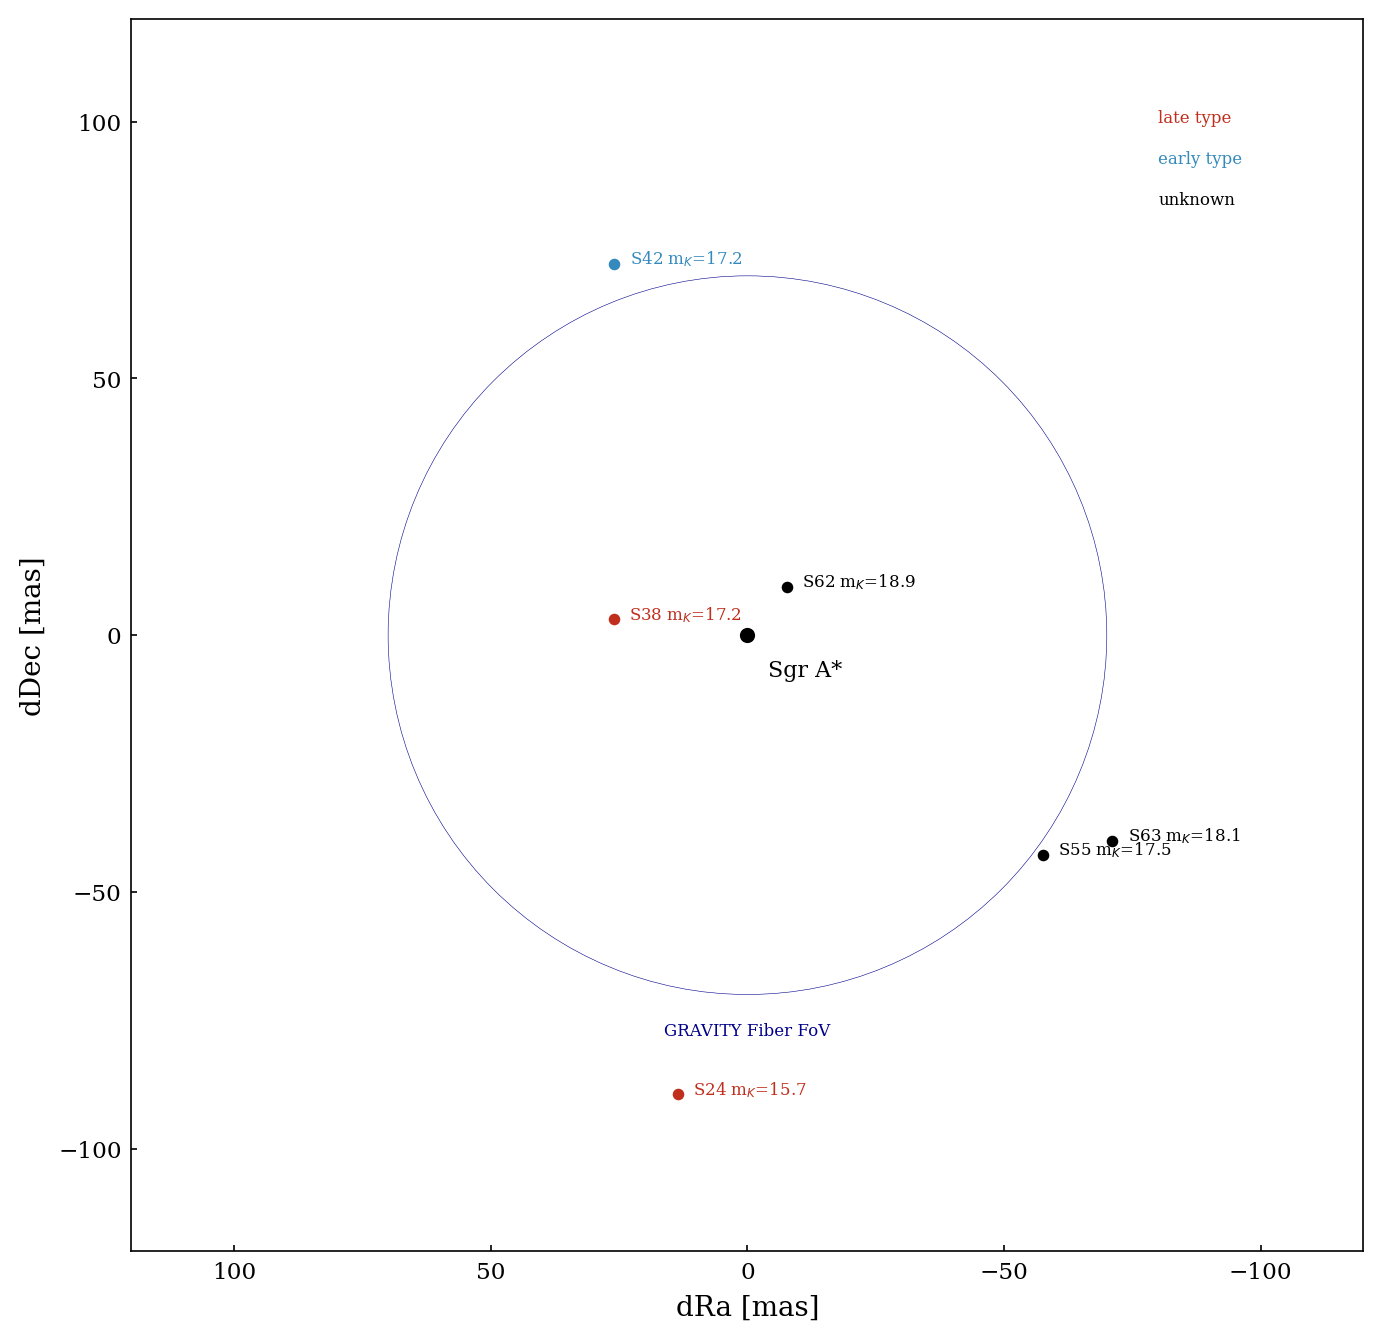

In [9]:
orb.plotOrbits(tstr, long=True, figsize=8)

In [10]:
import gravipy
orb = gravipy.GCorbits(verbose=False)
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]

s38 = orb.pos_orbit('S38', t)*1e3
s62 = orb.pos_pm('S62', t)*1e3
s62s38 = 10**(-0.4*(orb.star_pms['S62']['Kmag'] - orb.star_orbits['S38']['Kmag']))

# Full night corrections

**Only works on gvraid!**

# Fitting
## Look at data

In [11]:
data = sorted(glob.glob('data/*.fits'))

In [12]:
data

['data/GRAVI.2022-09-14T23:50:37.719_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-14T23:56:55.735_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:14:43.780_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:21:31.797_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:28:25.814_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:34:46.830_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:41:04.846_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:47:37.863_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:53:58.879_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:02:40.901_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:09:22.918_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:15:52.934_dualscivis_science_dualsciviscalibrated

In [13]:
_ = [print(fits.open(i)[0].header['ESO INS SOBJ OFFX'],
           fits.open(i)[0].header['ESO INS SOBJ OFFY'])
     for i in data]

10.509 164.113
0.0 0.0
0.0 0.0
0.0 0.0
10.509 164.113
9.71 76.951
9.71 76.951
10.509 164.113
10.0 -97.693
10.0 -97.693
10.0 -97.693
0.0 0.0
0.0 0.0
10.509 164.113
0.0 0.0


In [14]:
sgfiles = []
s2files = []
northfiles = []
southfiles = []
for d in data:
    h = fits.open(d)[0].header
    if h['ESO INS SOBJ OFFX'] == 0:
        sg_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        sgfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.509:
        s2files.append(d)
        s2_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
    elif h['ESO INS SOBJ OFFX'] == 9.71:
        n_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('North')
        northfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.:
        s_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('South')
        southfiles.append(d)
    else:
        print([h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']])


North
North
South
South
South


Category: DUAL_SCI_VIS_CALIBRATED
Telescope: UT
Polarization: SPLIT
Resolution: LOW
DIT: 10.000000
NDIT: 32


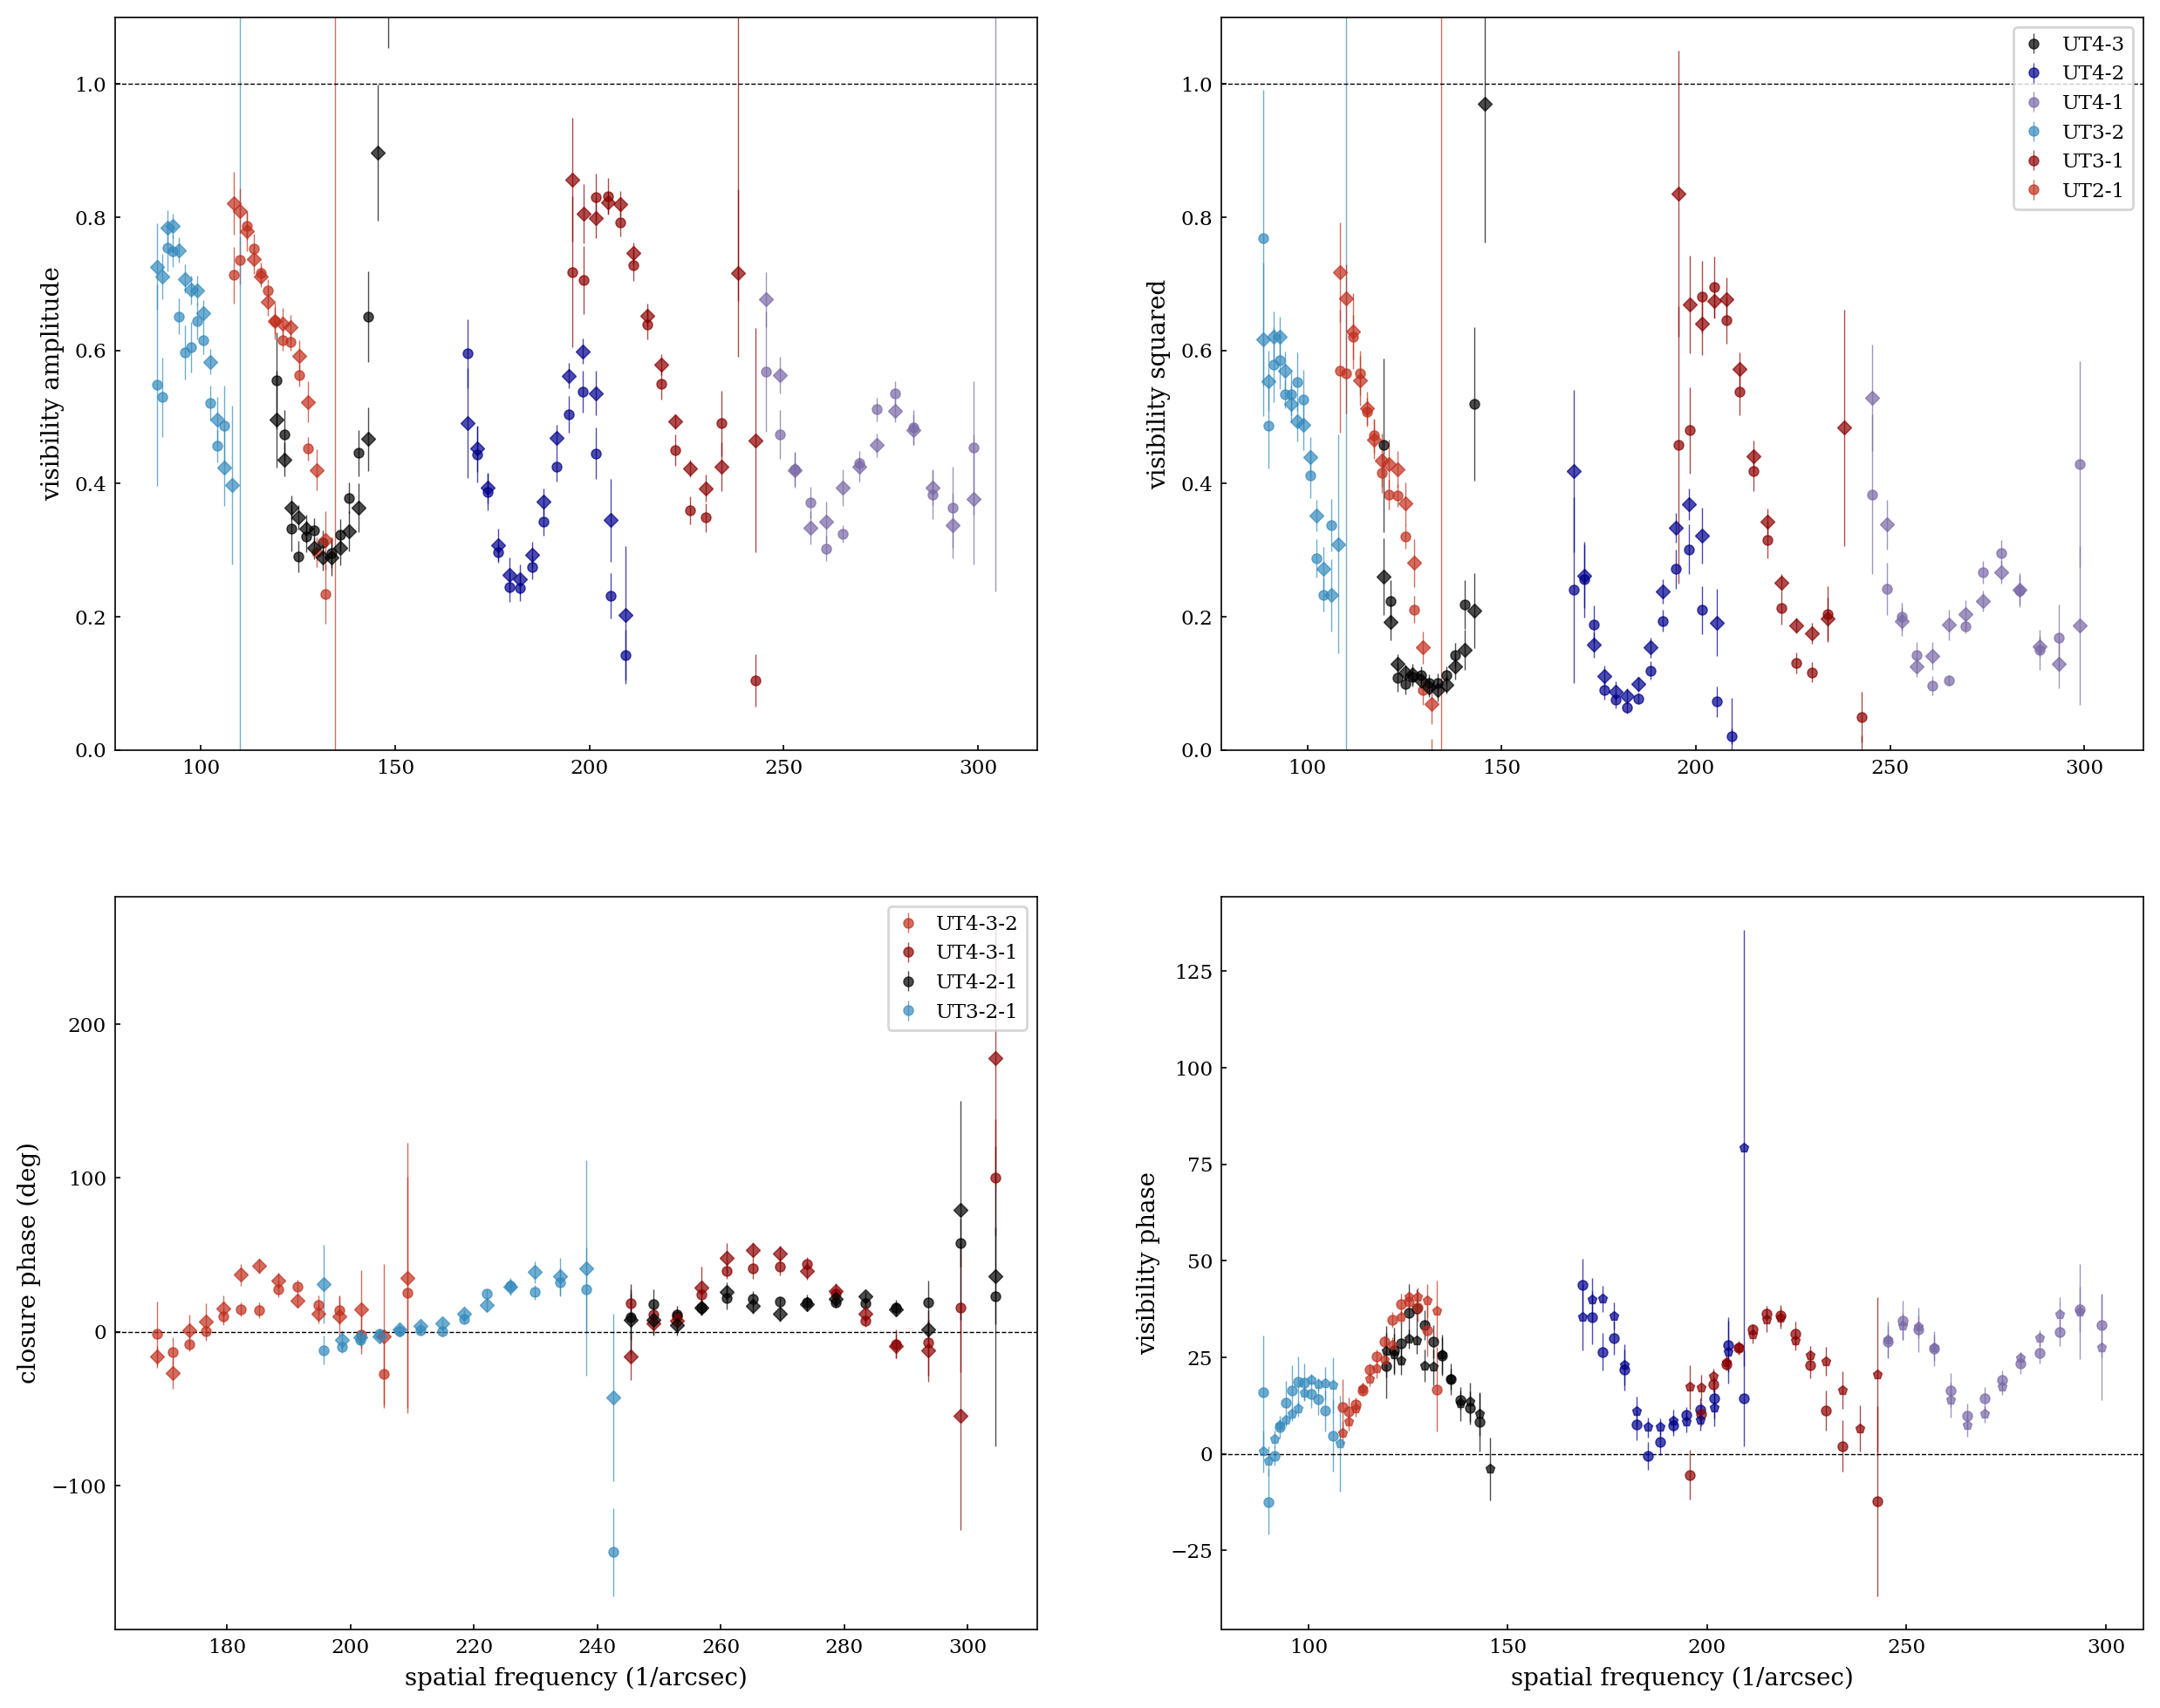

In [15]:
file = sgfiles[0]
d = gravipy.GravData(file)
d.getIntdata(plot=True)

In [16]:
fi = sgfiles[0]
f = gravipy.GravMFit(fi)

In [ ]:
# Only neceassary once!
f.createPhasemaps(nthreads=14)

Used file: phasemap_zernike_20200918_diff_2019data.npy
Creating phasemaps:
StopB : 8.00
StopS : 0.96
Smooth: 15.00
amax: 100


In [ ]:
f.fitStars(
    # Mandatory arguments
    [s38[0], s62[0]],       # Ra guess, len = nsource, 
    [s38[1], s62[1]],       # Dec guess, len = nsource
    [s62s38],               # flux ratio guess, len = nsource-1
    # optional arguments
    fit_pos=[True, False],  # to not fit star positions
    fit_fr=[True],          # to not fit flux ratios
    fit_for=[0.5, 0.5, 1, 0. ], # what to fit for & weight [VisAmp, Vis2, closure, phases]
    nthreads=20,
    nwalkers=201,
    nruns=301,
    initial=[-4, 1,         # initial guesses: [alpha, fr BG, pc (x2), fr BH, coh. loss]
             0, 0, 
             0.5 , 1],
    plotScience=True,       # show data & fit
    #iopandas='Normalfit'
    )


In [ ]:
f.fittab

# Fitting - not SgrA*

In [ ]:
s42 = orb.pos_orbit('S42', t)*1e3
s29 = orb.pos_orbit('S29', t)*1e3
s42s29 = 10**(-0.4*(orb.star_orbits['S42']['Kmag'] - orb.star_orbits['S29']['Kmag']))

In [ ]:
sep = s42-s29
pc = s29 - n_off

In [ ]:
fi = northfiles[0]
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 1, 1, 1. ],
           initial=[3, 3, *pc, s42s29, 1],
           plotScience=True)

In [ ]:
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 0, 0, 1. ],
           initial=[3, 3, 
                    *pc, 
                    s42s29, 1],
           plotScience=True,
           no_fit=True)

In [ ]:
pwd